# Notebook 2 – Exploratory analysis and basic modelling of Conington coins
### goal: explore distributions and try simple clustering / classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [3]:
import pandas as pd

coins = pd.read_csv("../data/conington_coins_clean.csv")
type(coins)  # this will be <class 'pandas.core.frame.DataFrame'>
coins.info()
coins.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SITECODE        90 non-null     object 
 1   PERIOD          60 non-null     float64
 2   CONTEXT         90 non-null     int64  
 3   MATERIAL        90 non-null     object 
 4   COIN_TYPE       42 non-null     object 
 5   COIN_REGIME     42 non-null     object 
 6   RULER           19 non-null     object 
 7   COIN_EDATE      59 non-null     float64
 8   COIN_LDATE      61 non-null     float64
 9   DENOMINATION    20 non-null     object 
 10  DIAMETER        43 non-null     float64
 11  MINT            12 non-null     object 
 12  COIN_CONDITION  12 non-null     object 
 13  mid_date        59 non-null     float64
 14  date_span       59 non-null     float64
dtypes: float64(6), int64(1), object(8)
memory usage: 10.7+ KB


,SITECODE,PERIOD,CONTEXT,MATERIAL,COIN_TYPE,COIN_REGIME,RULER,COIN_EDATE,COIN_LDATE,DENOMINATION,DIAMETER,MINT,COIN_CONDITION,mid_date,date_span
0,A14-32,99.0,320002,COPPER ALLOY,NaN,NaN,NaN,700.0,900.0,NaN,NaN,NaN,NaN,800.0,200.0
1,A14-32,99.0,320002,COPPER ALLOY,COPY,R,CONSTANTIUS II,330.0,335.0,NaN,16.0,TRIER,NaN,332.5,5.0
2,A14-32,99.0,320002,SILVER,COIN,E,NaN,1066.0,1485.0,NaN,9.0,NaN,CUTQ,1275.5,419.0
3,A14-32,99.0,320002,COPPER ALLOY,COIN,R,VALENTINIAN I,364.0,365.0,NUMMUS,20.0,ARLES,NaN,364.5,1.0
4,A14-32,99.0,320002,COPPER ALLOY,JETTON,N,NaN,1550.0,1635.0,NaN,24.0,NaN,NaN,1592.5,85.0


Modeling Question: Can basic features group coins into meaningful clusters?” (K‑Means on numeric columns like date, diameter, weight)

In [4]:
# 1. Value counts per PERIOD column
period_counts = coins['PERIOD'].value_counts().sort_index()
period_counts


PERIOD
6.4     11
7.1      5
7.3      6
99.0    38
Name: count, dtype: int64

In [5]:
period_props = coins['PERIOD'].value_counts(normalize=True).sort_index()
period_props


PERIOD
6.4     0.183333
7.1     0.083333
7.3     0.100000
99.0    0.633333
Name: proportion, dtype: float64

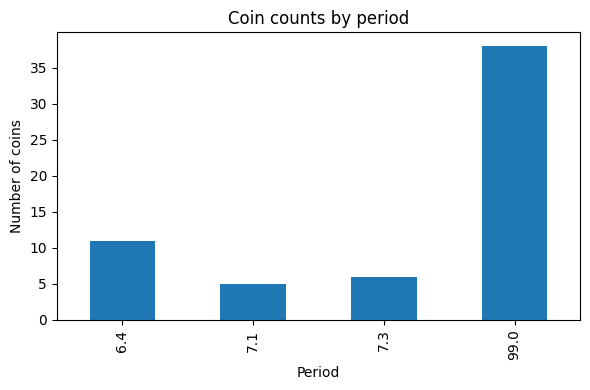

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
period_counts.plot(kind='bar')
plt.xlabel('Period')
plt.ylabel('Number of coins')
plt.title('Coin counts by period')
plt.tight_layout()
plt.show()
